# Imports

In [245]:
import pandas as pd
import boto
import s3fs
import matplotlib.pyplot as plt
import datetime 
from pandas.api.types import is_numeric_dtype

# Functions

# Config

In [246]:
pd.options.display.max_columns = None

## Read CSV

In [247]:
df = pd.read_csv('s3://g13batalha/2018-11-10_Sistema_E-Saude_Medicos_-_Base_de_Dados.csv',
                 sep=';', error_bad_lines=False, low_memory=False, encoding='windows_1252')

# Explore

In [248]:
df['Data do Atendimento'] = pd.to_datetime(df['Data do Atendimento'], infer_datetime_format=True)

In [249]:
df.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,Descrição do CBO,Código do CID,Descrição do CID,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro
0,2018-09-18 20:39:46,12/03/2011 00:00:00,F,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,MEDICO CLINICO,J069,INFECCAO AGUDA DAS VIAS AEREAS SUPERIORES NAO ...,Nao,2,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PORTO AMAZONAS,BAIRRO NAO INFORMADO ...
1,2018-09-30 18:38:45,23/09/1984 00:00:00,F,2,UPA,5323495,UPA CIDADE INDUSTRIAL,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,MEDICO CLINICO,N390,INFECCAO DO TRATO URINARIO DE LOCALIZACAO NAO ...,Nao,49,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CURITIBA,CIDADE INDUSTRIAL
2,2018-09-20 19:26:16,03/12/1996 00:00:00,F,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,MEDICO CLINICO,J069,INFECCAO AGUDA DAS VIAS AEREAS SUPERIORES NAO ...,Nao,52,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CURITIBA,CIDADE INDUSTRIAL
3,2018-07-05 12:56:28,13/06/1931 00:00:00,M,1,BASICO,16845,UMS SAO BRAZ,301010064,CONSULTA MEDICA EM ATENCAO BASICA,225125,MEDICO CLINICO,Z000,EXAME MEDICO GERAL,Sim,1260,220,0,Sim,AVALIAÇÃO COMPLEMENTAR DO APARELHO DIGESTIVO,Nao,NaN,NaN,NaN,NaN,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SAO BRAZ ...
4,2018-07-26 07:46:41,13/06/1931 00:00:00,M,1,BASICO,16845,UMS SAO BRAZ,301010064,CONSULTA MEDICA EM ATENCAO BASICA,225125,MEDICO CLINICO,Z000,EXAME MEDICO GERAL,Nao,0,0,0,Sim,CIRURGIA GERAL,Nao,NaN,NaN,NaN,NaN,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SAO BRAZ ...


In [250]:
df.shape

(962710, 37)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962710 entries, 0 to 962709
Data columns (total 37 columns):
Data do Atendimento                             962710 non-null datetime64[ns]
Data de Nascimento                              962710 non-null object
Sexo                                            962710 non-null object
Código do Tipo de Unidade                       962710 non-null int64
Tipo de Unidade                                 962710 non-null object
Código da Unidade                               962710 non-null int64
Descrição da Unidade                            962710 non-null object
Código do Procedimento                          962710 non-null int64
Descrição do Procedimento                       962710 non-null object
Código do CBO                                   962710 non-null object
Descrição do CBO                                962710 non-null object
Código do CID                                   962544 non-null object
Descrição do CID                

In [252]:
df.describe()

,Código do Tipo de Unidade,Código da Unidade,Código do Procedimento,Qtde Dispensada Farmácia Curitibana,Cômodos
count,962710.000000,9.627100e+05,9.627100e+05,962710.000000,938552.000000
mean,1.430413,2.062340e+06,3.009875e+08,47.811001,5.244176
std,0.597716,2.561188e+06,2.787061e+06,158.819036,6.600582
min,1.000000,1.546600e+04,1.010400e+08,0.000000,-4.000000
25%,1.000000,1.708600e+04,3.010101e+08,0.000000,4.000000
50%,1.000000,1.749300e+04,3.010101e+08,0.000000,5.000000
75%,2.000000,3.359646e+06,3.010600e+08,20.000000,6.000000
max,3.000000,9.381015e+06,3.010800e+08,18056.000000,1500.000000


In [253]:
numeric_columns = []
for column in df.columns:
    if is_numeric_dtype(df[column]):
        numeric_columns.append(column)

In [254]:
numeric_columns

['Código do Tipo de Unidade',
 'Código da Unidade',
 'Código do Procedimento',
 'Qtde Dispensada Farmácia Curitibana',
 'Cômodos']

## Create Columns

In [106]:
df['Data_Dia'] = df['Data do Atendimento'].dt.floor('d')
df['Data_Hora'] = df['Data do Atendimento'].dt.floor('h')

# Atendimentos por tempo

In [82]:
def atendimentos_tempo(df, window='h', cid=None):
    df['Data_Dia'] = df['Data do Atendimento'].dt.floor(window)
    df.set_index('Data do Atendimento')
    if cid:
        df = df[df['Código do CID'] == cid]
    ts = df['Data_Dia'].value_counts()
    plt.figure(figsize=(15, 10))
    ts.plot()

### Atendimentos por hora

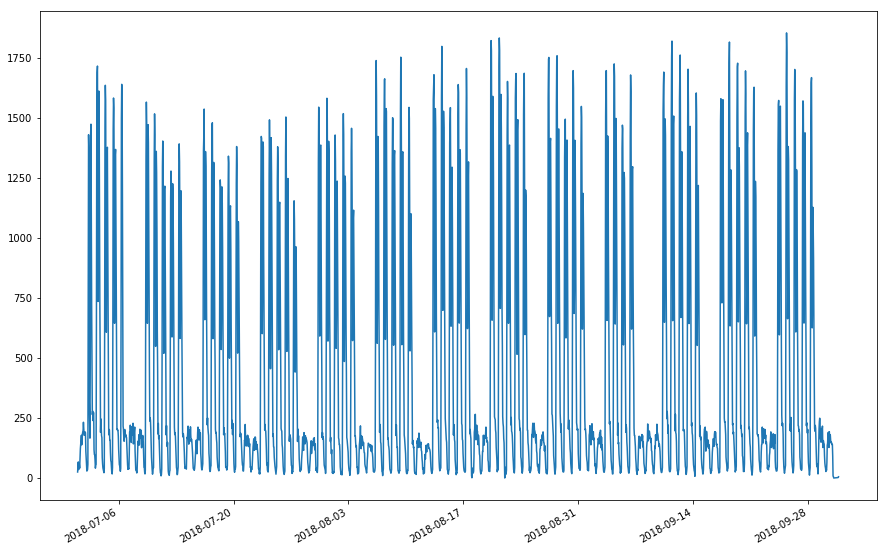

In [84]:
atendimentos_tempo(df)

### Atendimentos por hora CID='J00'

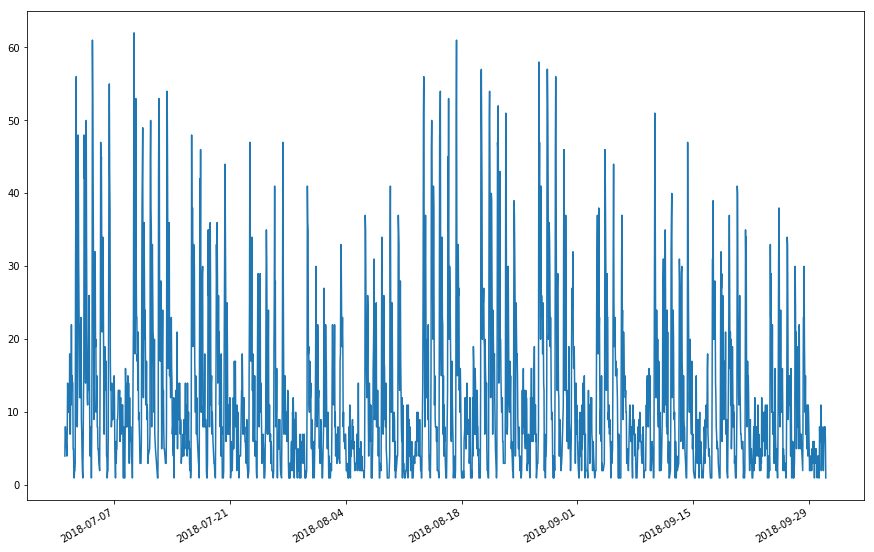

In [85]:
atendimentos_tempo(df, cid='J00')

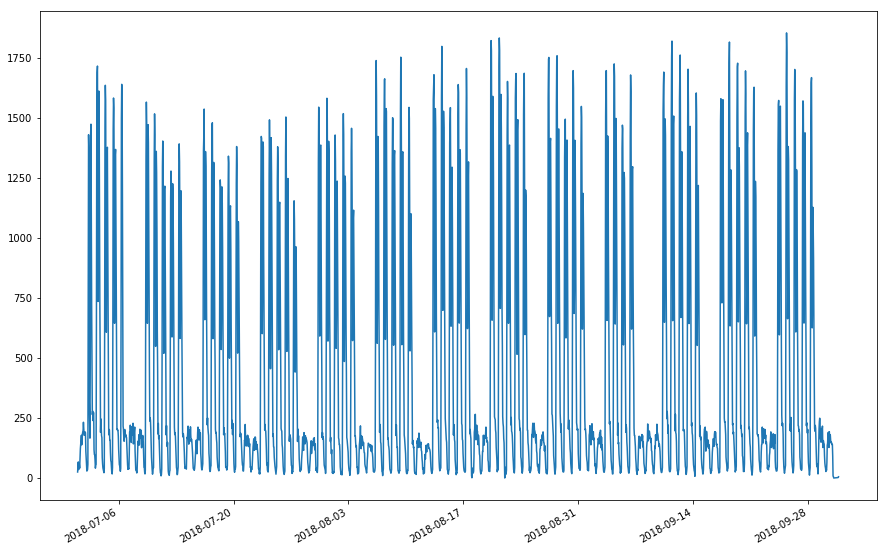

In [81]:
atendimentos_tempo(df)

In [96]:
df2['Data_Dia'].value_counts()

2018-07-09 09:00:00    62
2018-08-17 09:00:00    61
2018-07-04 08:00:00    61
2018-08-27 08:00:00    58
2018-08-28 09:00:00    57
2018-08-20 09:00:00    57
2018-08-28 08:00:00    57
2018-07-02 09:00:00    56
2018-08-13 10:00:00    56
2018-08-20 08:00:00    56
2018-08-29 09:00:00    56
2018-07-06 09:00:00    55
2018-08-21 09:00:00    54
2018-07-13 09:00:00    54
2018-08-15 10:00:00    54
2018-07-04 09:00:00    53
2018-07-12 09:00:00    53
2018-08-16 10:00:00    53
2018-07-09 14:00:00    53
2018-08-22 10:00:00    52
2018-09-10 09:00:00    51
2018-07-12 10:00:00    51
2018-08-28 10:00:00    51
2018-08-23 08:00:00    51
2018-08-13 09:00:00    51
2018-07-11 09:00:00    50
2018-08-21 08:00:00    50
2018-07-03 14:00:00    50
2018-08-14 09:00:00    50
2018-08-17 08:00:00    49
                       ..
2018-07-29 12:00:00     1
2018-07-18 05:00:00     1
2018-09-06 01:00:00     1
2018-08-19 06:00:00     1
2018-07-22 01:00:00     1
2018-08-08 01:00:00     1
2018-08-12 01:00:00     1
2018-08-17 0

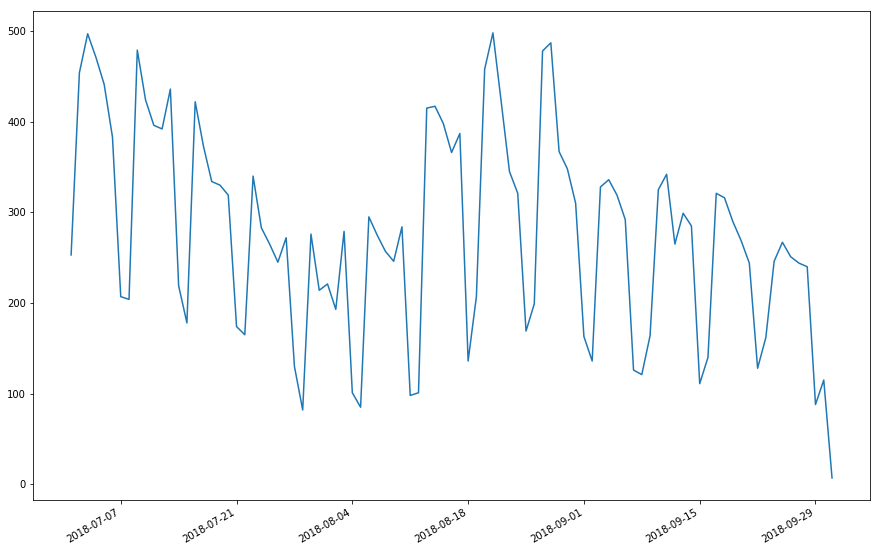

In [97]:
window='d'
cid=None
df2['Data_Dia'] = df['Data do Atendimento'].dt.floor(window)
df2.set_index('Data do Atendimento')
if cid:
    df2 = df2[df2['Código do CID'] == cid]
ts = df2['Data_Dia'].value_counts()
plt.figure(figsize=(15, 10))
ts.plot()

In [93]:
df.groupby(['Código da Unidade', 'Código do CID']).agg('count').sort_values('Sexo', ascending=False)

,,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,Descrição do CBO,Descrição do CID,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Data_Dia
Código da Unidade,Código do CID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17086,Z000,3584,3584,3584,3584,3584,3584,3584,3584,3584,3584,3584,3584,3584,3584,3584,3584,575,3584,1,1,1,1,3245,3245,3584,3245,3245,3245,3584,3245,3245,3245,3245,3584,3584,3584
2438917,Z000,3577,3577,3577,3577,3577,3577,3577,3577,3577,3577,3577,3577,3577,3577,3577,3577,0,3577,24,24,24,24,2902,2902,3577,2902,2902,2902,3397,2902,2902,2902,2902,3577,3577,3577
3270785,Z029,3397,3397,3397,3397,3397,3397,3397,3397,3397,3397,3397,3397,3397,3397,3397,3397,1106,3397,0,0,0,0,3180,3180,3397,3180,3180,3180,3384,3180,3180,3180,3180,3397,3397,3397
17396,J069,3388,3388,3388,3388,3388,3388,3388,3388,3388,3388,3388,3388,3388,3388,3388,3388,0,3388,3,3,3,3,1789,1789,3388,1789,1789,1789,2904,1788,1788,1788,1788,3388,3388,3388
2639556,J069,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,0,3248,2,2,2,2,2792,2792,3248,2792,2792,2792,3146,2792,2792,2792,2792,3248,3248,3248
9214097,J069,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,0,3114,5,5,5,5,2714,2714,3114,2714,2714,2714,3072,2714,2714,2714,2714,3114,3114,3114
17329,Z000,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,628,3082,1,1,1,1,2972,2972,3082,2972,2972,2972,3080,2972,2972,2972,2972,3082,3082,3082
2639556,J00,2985,2985,2985,2985,2985,2985,2985,2985,2985,2985,2985,2985,2985,2985,2985,2985,0,2985,8,8,8,8,2571,2571,2985,2571,2571,2571,2922,2571,2571,2571,2571,2985,2985,2985
17035,Z000,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963,753,2963,1,1,1,1,2779,2779,2963,2779,2779,2779,2961,2779,2779,2779,2779,2963,2963,2963


In [99]:
df.columns

Index(['Data do Atendimento', 'Data de Nascimento', 'Sexo',
       'Código do Tipo de Unidade', 'Tipo de Unidade', 'Código da Unidade',
       'Descrição da Unidade', 'Código do Procedimento',
       'Descrição do Procedimento', 'Código do CBO', 'Descrição do CBO',
       'Código do CID', 'Descrição do CID', 'Solicitação de Exames',
       'Qtde Prescrita Farmácia Curitibana',
       'Qtde Dispensada Farmácia Curitibana',
       'Qtde de Medicamento Não Padronizado',
       'Encaminhamento para Atendimento Especialista', 'Área de Atuação',
       'Desencadeou Internamento', 'Data do Internamento',
       'Estabelecimento Solicitante', 'Estabelecimento Destino',
       'CID do Internamento', 'Tratamento no Domicílio', 'Abastecimento',
       'Energia Elétrica', 'Tipo de Habitação', 'Destino Lixo', 'Fezes/Urina',
       'Cômodos', 'Em Caso de Doença', 'Grupo Comunitário',
       'Meio de Comunicacao', 'Meio de Transporte', 'Municício', 'Bairro',
       'Data_Dia'],
      dtype='object')

In [100]:
df.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,Descrição do CBO,Código do CID,Descrição do CID,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Data_Dia
0,2018-09-18 20:39:46,12/03/2011 00:00:00,F,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,MEDICO CLINICO,J069,INFECCAO AGUDA DAS VIAS AEREAS SUPERIORES NAO ...,Nao,2,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PORTO AMAZONAS,BAIRRO NAO INFORMADO ...,2018-09-18 20:00:00
1,2018-09-30 18:38:45,23/09/1984 00:00:00,F,2,UPA,5323495,UPA CIDADE INDUSTRIAL,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,MEDICO CLINICO,N390,INFECCAO DO TRATO URINARIO DE LOCALIZACAO NAO ...,Nao,49,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CURITIBA,CIDADE INDUSTRIAL,2018-09-30 18:00:00
2,2018-09-20 19:26:16,03/12/1996 00:00:00,F,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,MEDICO CLINICO,J069,INFECCAO AGUDA DAS VIAS AEREAS SUPERIORES NAO ...,Nao,52,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CURITIBA,CIDADE INDUSTRIAL,2018-09-20 19:00:00
3,2018-07-05 12:56:28,13/06/1931 00:00:00,M,1,BASICO,16845,UMS SAO BRAZ,301010064,CONSULTA MEDICA EM ATENCAO BASICA,225125,MEDICO CLINICO,Z000,EXAME MEDICO GERAL,Sim,1260,220,0,Sim,AVALIAÇÃO COMPLEMENTAR DO APARELHO DIGESTIVO,Nao,NaN,NaN,NaN,NaN,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SAO BRAZ ...,2018-07-05 12:00:00
4,2018-07-26 07:46:41,13/06/1931 00:00:00,M,1,BASICO,16845,UMS SAO BRAZ,301010064,CONSULTA MEDICA EM ATENCAO BASICA,225125,MEDICO CLINICO,Z000,EXAME MEDICO GERAL,Nao,0,0,0,Sim,CIRURGIA GERAL,Nao,NaN,NaN,NaN,NaN,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SAO BRAZ ...,2018-07-26 07:00:00


In [120]:
df['Código do Procedimento'].nunique()

23

In [160]:
columns = ['Data_Dia',  'Descrição da Unidade'] #'Descrição do CID',

In [161]:
df2 = df[columns]

In [162]:
df2.head()

,Data_Dia,Descrição da Unidade
0,2018-08-28,CENTRO DE ESPECIALIDADES SANTA FELICIDADE
1,2018-09-25,CENTRO DE ESPECIALIDADES SANTA FELICIDADE
2,2018-09-18,CENTRO DE ESPECIALIDADES SANTA FELICIDADE
3,2018-08-20,CENTRO DE ESPECIALIDADES SANTA FELICIDADE
4,2018-07-19,CENTRO DE ESPECIALIDADES SANTA FELICIDADE


In [268]:
df_lat_long = pd.read_csv('lat_long.csv')
df_lat_long.head()

,Descrição da Unidade,Lat,Long
0,CENTRO DE ESPECIALIDADES MAE CURITIBANA,-25.424009,-49.276112
1,CENTRO DE ESPECIALIDADES MEDICAS MATRIZ,-25.433020,-49.271729
2,CENTRO DE ESPECIALIDADES OUVIDOR PARDINHO,-25.443760,-49.271271
3,CENTRO DE ESPECIALIDADES SALGADO FILHO,-25.488461,-49.223061
4,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,-25.412571,-49.350670


In [202]:
df = df3.merge(df_lat_long, right_on='ÚNICO', left_on='Descrição da Unidade')

In [203]:
df.head()

,Data_Dia,Descrição do CID,Descrição da Unidade,counts,ÚNICO,Lat,Long
0,2018-08-28,EXAME NAO ESPECIFICADO COM FINALIDADES ADMINIS...,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,106,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,-25.412571,-49.35067
1,2018-09-25,EXAME NAO ESPECIFICADO COM FINALIDADES ADMINIS...,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,105,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,-25.412571,-49.35067
2,2018-09-18,EXAME NAO ESPECIFICADO COM FINALIDADES ADMINIS...,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,91,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,-25.412571,-49.35067
3,2018-08-20,EXAME NAO ESPECIFICADO COM FINALIDADES ADMINIS...,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,87,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,-25.412571,-49.35067
4,2018-07-19,EXAME NAO ESPECIFICADO COM FINALIDADES ADMINIS...,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,77,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,-25.412571,-49.35067


In [204]:
df3 = df2.groupby(list(df2.columns)).size().reset_index(name='counts').sort_values('counts', ascending=False)

In [205]:
from io import StringIO
import boto3

csv_buffer = StringIO()
df3.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('g13batalha', 'grouped.csv').put(Body=csv_buffer.getvalue())

{'ETag': '"f9ee3d00aa8e6e57ef3212cb34150dc1"',
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '0',
   'date': 'Sun, 09 Dec 2018 05:29:26 GMT',
   'etag': '"f9ee3d00aa8e6e57ef3212cb34150dc1"',
   'server': 'AmazonS3',
   'x-amz-id-2': 'w47dLlWJIo24ezESMJkIvNk/9N/JchLgFGMjJFf/FWi8vsvncQXfAd7MOAabUG6C7oLY2QtkII0=',
   'x-amz-request-id': '4655CEA4CAA7A638'},
  'HTTPStatusCode': 200,
  'HostId': 'w47dLlWJIo24ezESMJkIvNk/9N/JchLgFGMjJFf/FWi8vsvncQXfAd7MOAabUG6C7oLY2QtkII0=',
  'RequestId': '4655CEA4CAA7A638',
  'RetryAttempts': 0}}

In [206]:
df = df3.merge(df_lat_long, right_on='ÚNICO', left_on='Descrição da Unidade')

In [207]:
df.head()

,Data_Dia,Descrição da Unidade,counts,ÚNICO,Lat,Long
0,2018-09-11,UPA CAJURU,154,UPA CAJURU,-25.46958,-49.205921
1,2018-09-18,UPA CAJURU,149,UPA CAJURU,-25.46958,-49.205921
2,2018-08-23,UPA CAJURU,146,UPA CAJURU,-25.46958,-49.205921
3,2018-07-19,UPA CAJURU,144,UPA CAJURU,-25.46958,-49.205921
4,2018-09-28,UPA CAJURU,143,UPA CAJURU,-25.46958,-49.205921


In [208]:
import datetime
df_test = df[df['Data_Dia'] == datetime.datetime(2018, 8, 28)]

In [209]:
df_test.head()

,Data_Dia,Descrição da Unidade,counts,ÚNICO,Lat,Long
34,2018-08-28,UPA CAJURU,125,UPA CAJURU,-25.469580,-49.205921
147,2018-08-28,UPA BOA VISTA,115,UPA BOA VISTA,-25.385328,-49.232841
224,2018-08-28,UPA SITIO CERCADO,106,UPA SITIO CERCADO,-25.533409,-49.266708
322,2018-08-28,UPA PINHEIRINHO,94,UPA PINHEIRINHO,-25.515663,-49.294991
404,2018-08-28,UPA BOQUEIRAO,101,UPA BOQUEIRAO,-25.491570,-49.246440


In [210]:
df_test = df_test[['Lat', 'Long', 'counts']]

In [211]:
df_test.head()

,Lat,Long,counts
34,-25.469580,-49.205921,125
147,-25.385328,-49.232841,115
224,-25.533409,-49.266708,106
322,-25.515663,-49.294991,94
404,-25.491570,-49.246440,101


In [212]:
df_test = df_test.groupby(['Lat', 'Long']).agg('sum').reset_index()

In [213]:
from io import StringIO
import boto3

csv_buffer = StringIO()
df_test.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('g13batalha', 'mapa_calor.csv').put(Body=csv_buffer.getvalue())

{'ETag': '"ba5f8201423c4e9529da5a7a8a62cd33"',
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '0',
   'date': 'Sun, 09 Dec 2018 05:29:30 GMT',
   'etag': '"ba5f8201423c4e9529da5a7a8a62cd33"',
   'server': 'AmazonS3',
   'x-amz-id-2': 'qoAx3RVOIz4AkpgLHRIi9BVr63AcHCspIkecihumGqnfdp1/sfJ/eobt7qQ3GqX4UHHVNVWpQUM=',
   'x-amz-request-id': '411DA83C8872CD92'},
  'HTTPStatusCode': 200,
  'HostId': 'qoAx3RVOIz4AkpgLHRIi9BVr63AcHCspIkecihumGqnfdp1/sfJ/eobt7qQ3GqX4UHHVNVWpQUM=',
  'RequestId': '411DA83C8872CD92',
  'RetryAttempts': 0}}

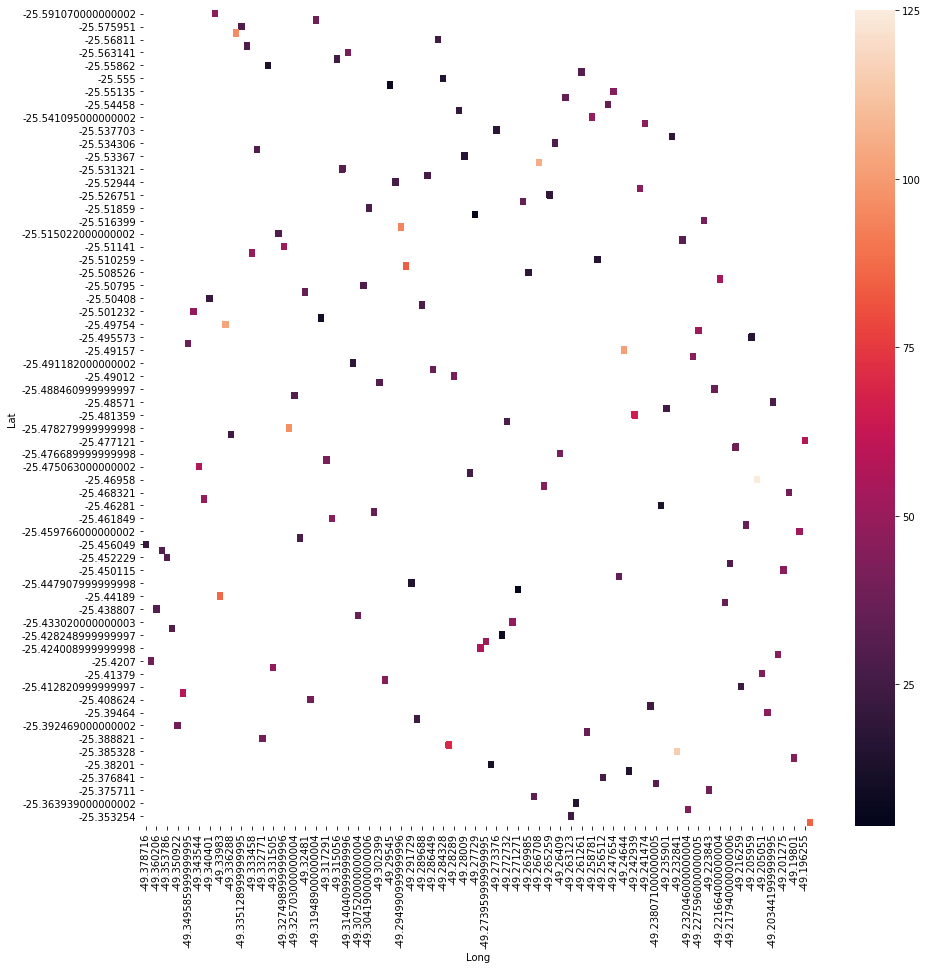

In [214]:
import seaborn as sns
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_test.reset_index().pivot("Lat", "Long", "counts"))

In [215]:
df_test.head()

,Lat,Long,counts
0,-25.591070,-49.340221,47
1,-25.584339,-49.319489,39
2,-25.575951,-49.335129,29
3,-25.575820,-49.336210,96
4,-25.568110,-49.285061,25
